# Electromagnetic wave absorption by a plasma
## Result analyser

To Plot ZDF data files you must first import the ZDF module

In [1]:
import numpy as np
import nb_hlpr.tooler as tooler
import nb_hlpr.widg as widg
import nb_hlpr.visual as visual
from IPython.display import HTML

First you need to select the data files that correspond to your simulation using the file chooser below.
<br> You may also specify the data type (*e.g* "charge")

You can also choose to plot a single quantity or two at the same time on the "Settings" tab.



In [2]:
tab=widg.tabmaker()
tab

### Visualization

Here you can use the slider to advance or go backwards in time

In [8]:
ylims=[[0,0],[0,0]]
fils=[]
%matplotlib inline
widg.shower(tab,ylims,fils)[0]

<function nb_hlpr.visual.pltinteract.<locals>.pltstf>

You may also produce a video

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


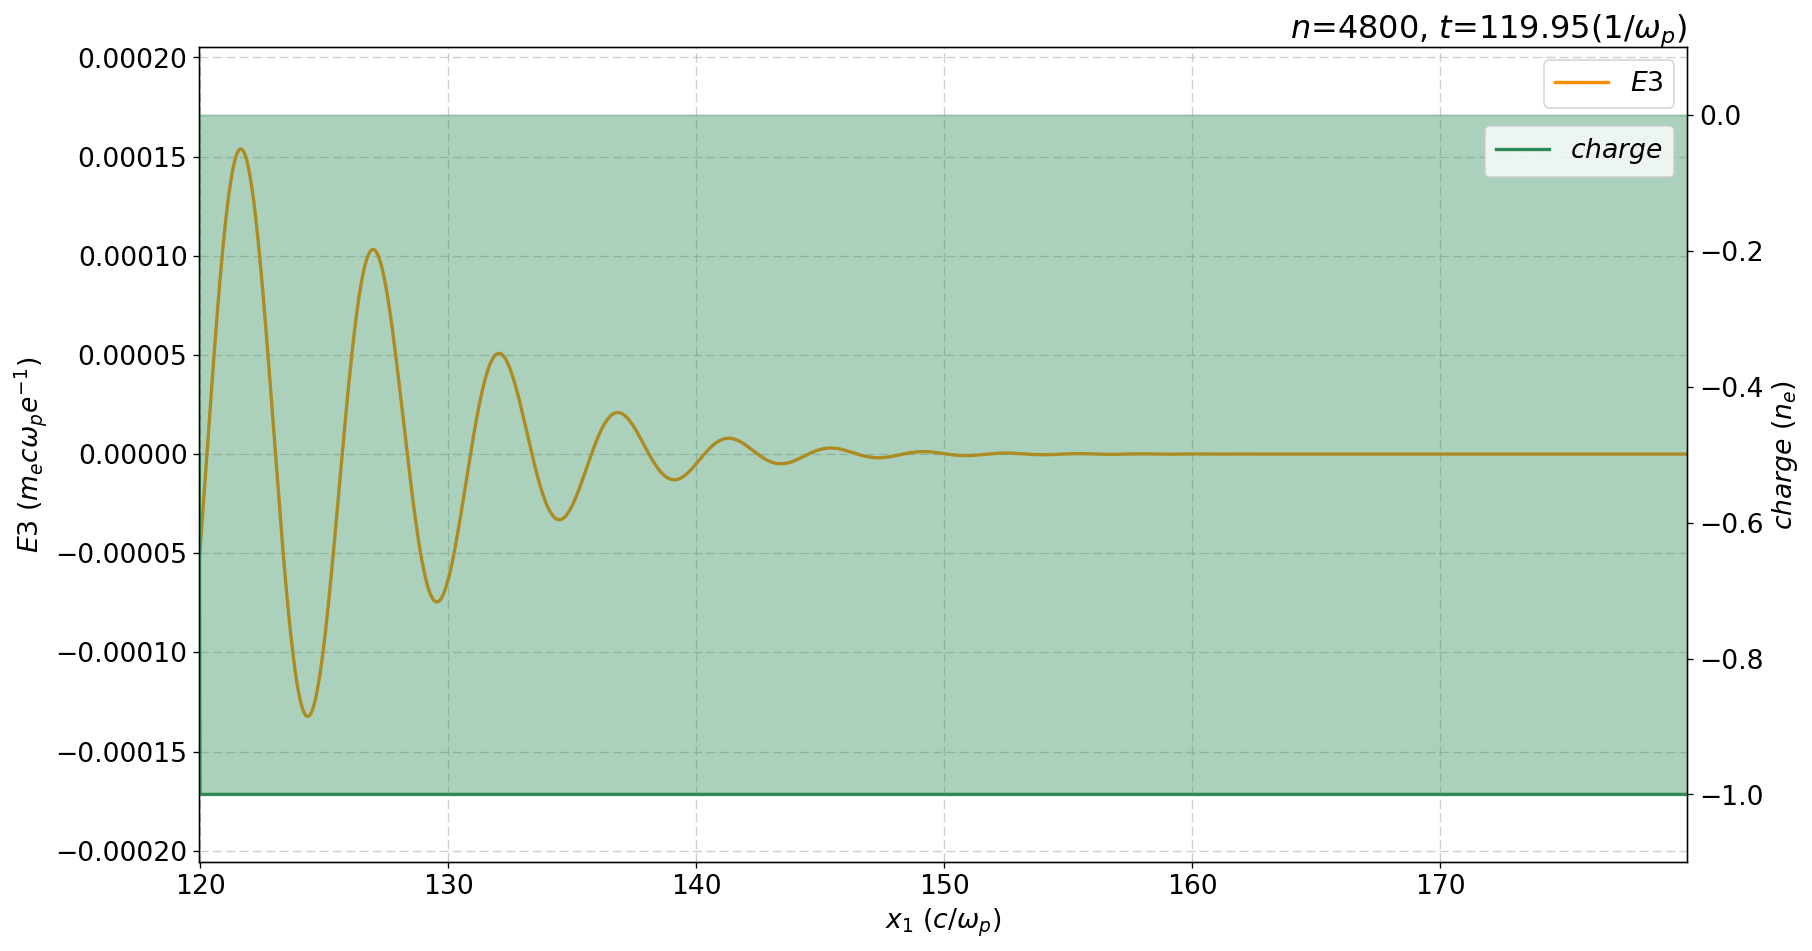

In [9]:
anim=visual.animate(tab,ylims)

HTML(anim.to_html5_video())

And save it using a name of your choice, choose wisely as it can't be changed later

In [5]:
anim.save("aa8.mp4",fps=30)

In [4]:
nb_hlpr.shower(tab,ylims,fils)[0]

<function nb_hlpr.pltinteract.<locals>.pltstf>

# Comparison with expected results

When an electromagnetic wave reaches a plasma with an certain electron density $n_e$, two possible scenarios may occur:
it can keep propagating normally, or it can fade away  exponentially until a given length.

The key to understand why such distinct phenomena  may happen lies both on Maxwell's
equations and on the 
equation for the dielctric response  of a non collisional plasma when excited by an
electromagnetic wave which when linearized arround $\mathbf{v_{e0}}=0$ yields:

\begin{equation}
  \frac{\partial \mathbf{v_e}}{\partial t}+(\mathbf{v_e}\cdot\mathbf{\nabla})\mathbf{v_e}=-\frac{e}{m_e}\mathbf{E}\Leftrightarrow   i\omega \mathbf{v_{e1}}=\frac{e\mathbf{E_1}}{m_e}
  \end{equation}

Ampère's law states that:

\begin{equation}
  c^2\mathbf{\nabla}\times\mathbf{B_1}=\frac{1}{\varepsilon_0}\mathbf{j_1}+\mathbf{\dot{E}_1}\Leftrightarrow c^2\mathbf{\nabla}\times\mathbf{\dot{B}_1}=\frac{1}{\varepsilon_0}\frac{\partial\mathbf{j_1}}{\partial t}+\mathbf{\ddot{E}_1}
\end{equation}

assuming an $\exp{[-i(\omega t- \mathbf{k}\cdot\mathbf{r})]}$ dependence and
transverse waves ($\mathbf{k}\cdot\mathbf{E}=0)$ and
using the differential form of Faraday's law of induction ($\mathbf{\nabla}\times\mathbf{E}=\mathbf{\dot{B}}$) it is possible to arrive to:

\begin{equation}
(  \omega^2-c^2k^2)\mathbf{E_1}=-i\frac{\omega \mathbf{j_1}}{\varepsilon_0}=\frac{n_{e0}e^2}{\varepsilon_0m_e}\mathbf{E_1}
\end{equation}

From the previous equation one can identify the plasma frequency
$\omega_p=\sqrt{\frac{n_{e0}e^2}{\varepsilon_0m_e}}$ and arrive to the conclusion that
$c^2k^2=\omega^2-\omega_p^2$. This way it is possible to find two different situations

* $\omega^2\geq\omega_p^2\Rightarrow k^2\geq 0\Rightarrow$ $k$ is real, so
  the wave may propagate  with an oscilatory term ($\propto\exp{(ikr)}$).

* $\omega^2\leq\omega_p^2\Rightarrow k^2\leq 0\Rightarrow$ $k$ is imaginary,
  therefore, the wave may propagate in space with an exponential attenuation term ($\propto\exp{(-kr)}$). The typical legth for the propagation of an attenuated wave is the so called *skin depth*:

\begin{equation}
\delta=k^{-1}=\frac{c}{\sqrt{\omega_{pe}^2-\omega^2}} \;\;\text{(SI)}\;\;=\frac{1}{\sqrt{1-\omega^2}}\;\; (c/\omega_{pe})
\end{equation}

## Approach #1: Underdense palsma

Initialize a plasma with a step density profile on your inputdeck: 

```   t_density density = { .type = STEP, .start = 50 }; ```

Then initialize a laser pulse with a frequency bigger than the plasma frequency:

``` 
t_emf_laser laser = {	  
    .start =45.0,
    .fall  = 20,
    .rise  = 20 ,
    .flat  =0,
    .a0 = 0.001,
    .omega0 = 6,
    .polarization = M_PI_2
  };
 ```
 
Use the file browser to select your simulation files, if the theory is correct then you should see the wave propagating through the palsma

In [2]:
tabsd=widg.tabmaker()
tabsd

In [17]:
ylimssd=[[0,0],[0,0]]
filssd=[]
widg.shower(tabsd,ylimssd,filssd)[0]

<function nb_hlpr.visual.pltinteract.<locals>.pltstf>

### Dispersion Relation

The propagation of E.M. waves in a plasma with uniform density is caracterized by the following dispersion relation:

\begin{equation}
 c^2k^2=\omega^2-\omega_p^2 
 \end{equation}
 
 You can perform several simulations with different values for $\omega$ and calculate the wave number using
 the ```kcalculator``` tool and then check if the results agree with the theory.
 
Note: $c=\omega_p=1$ <br> 
Note2: You need to select an adequate time using the slider above <br>
Note3: You also need to plot both the charge and the Eflied
  

In [18]:
file2=filssd[0]
file1=filssd[1]

tooler.kcalculator(file1,file2)

<function nb_hlpr.tooler.regselect>

### Dispersion Relation- Take 2 (Moving Window Exclusive)

You may also verify the dispersion relation with following tool:

We can get the phase velocity from the dispersion relation:


\begin{equation}
 k^2=\omega^2-\omega_p^2 \Rightarrow v_f=\frac{\omega}{k}\sqrt{1+\frac{1}{\omega^2-1}}
 \end{equation}
 
 Which is bigger than the speed of light in vacuum.
 
 The following plot will show you the typical behaviour of the wave as time goes by as seen from a moving window that travels at the speed of light in vaccum:
 
 
<img src="cenafixe.png" alt="Drawing" style="width: 700px;"/>


 Points with the same phase will have the same color and you can see that at as the wave enters the palsma, points with the same phase will move forward in $x$. The speed at which they move forward is the phase velocity, $v_f-c=v_f-1$

Therefore, the slope of the lines will be given by
 \begin{equation}
m=\frac{1}{v_f-1}
\end{equation}

The following tool allos you to plot the predticted slope and compare it with the results you obtained.The following tool allos you to plot the predticted slope and compare it with the results you obtained.

In [3]:
widg.HeatMap_shower(tabsd,1.5)

/usr/local/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function nb_hlpr.widg.HeatMap_shower.<locals>.ddplt>

## Approach #2: Overdense palsma

Initialize a plasma with a step density profile on your inputdeck: 

```   t_density density = { .type = STEP, .start = 50 }; ```

Then initialize a laser pulse with a frequency smaller than the plasma frequency:

```
t_emf_laser laser = {	  
    .start =45.0,
    .fall  = 20,
    .rise  = 20 ,
    .flat  =0,
    .a0 = 0.001,
    .omega0 = 0.4,
    .polarization = M_PI_2
  };
 ```
 
Use the file browser to select your simulation files, if the theory is correct then you should see the wave being absorbed by the palsma

In [2]:
tabod=widg.tabmaker()
tabod

In [3]:
ylimsod=[[0,0],[0,0]]
filsod=[]
widg.shower(tabod,ylimsod,filsod)[0]

<function nb_hlpr.pltinteract.<locals>.pltstf>

In [9]:
anim=visual.animate(tabod,ylimsod)

HTML(anim.to_html5_video())

In [ ]:
anim.save("aa4.mp4",fps=120)

In [4]:
import ipywidgets as widgets

a = widgets.FloatText(value=0.9,description='$\omega:$')
a

-1.23956e-05
1.49095


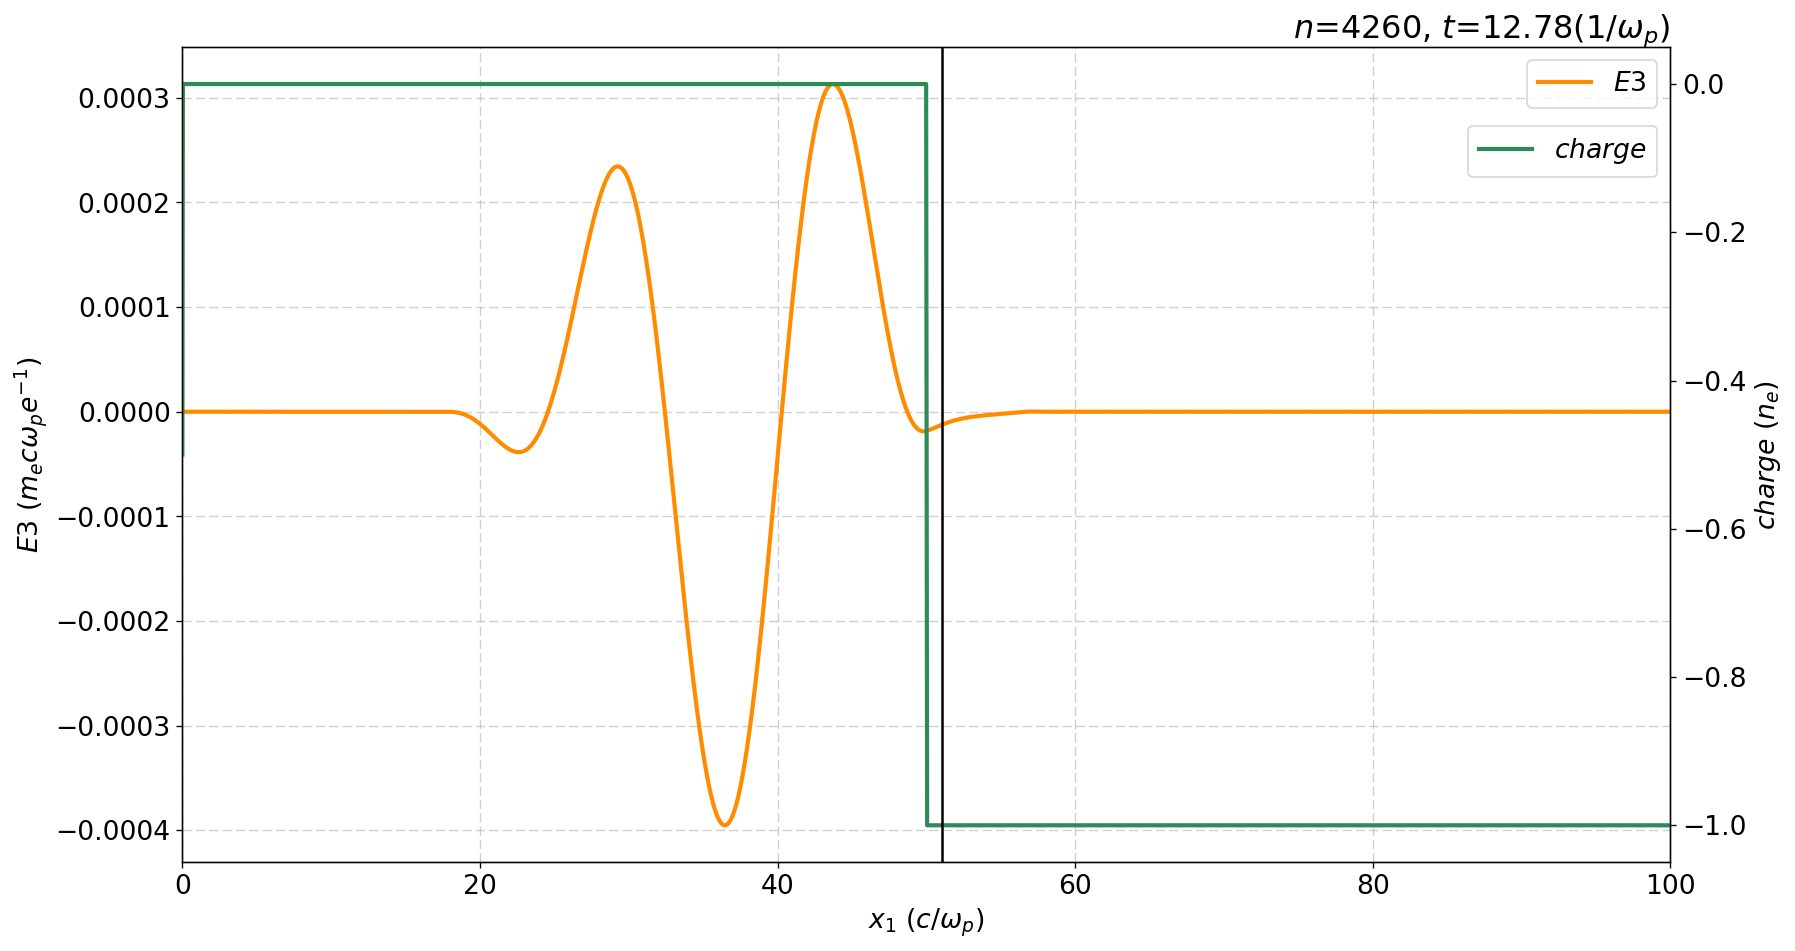

In [6]:
tooler.skin_depth(tabod,filsod,a.value)

## Approach #3: Palsma Filter

Initialize a plasma with a step density profile on your inputdeck: 

```   t_density density = { .type = STEP, .start = 50 }; ```

Then initialize a laser pulse  composed of two differente frequencies, one larger than the plasma frequency and one samller than the plasmas frequency.:


```
  t_emf_laser laser = {	  
    .start =45.0,
    .fall  = 20,
    .rise  = 20 ,
    .flat  =0,
    .a0 = 0.001,
    .omega0 = 0.4,
    .polarization = M_PI_2
  };

    // Add laser pulse (this must come after sim_new)
  t_emf_laser laser2 = {	  
    .start =45.0,
    .fall  = 20,
    .rise  = 20 ,
    .flat  =0,
    .a0 = 0.0001,
    .omega0 = 6,
    .polarization = M_PI_2
  };
 ```
 
Use the file browser to select your simulation files, if the theory is correct then you should see the wave being absorbed by the palsma

In [ ]:
tabod=nb_hlpr.tabmaker()
tabod

Use the slider to move the simulation back and forth in time

In [ ]:
ylimsod=[[0,0],[0,0]]
filsod=[]
widg.shower(tabod,ylimsod,filsod)[0]

See the results in a video

In [ ]:
anim=visual.animate(tabod,ylimsod)

HTML(anim.to_html5_video())